In [2]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:\Users\Ivan\Desktop\Severstal\Stat2018.csv")

## Первый шаг - выяснить структуру данных

In [98]:
data

,sheet_num,speed,steel,defects_greater_then_3,speed_greater_than_4
0,3,3.8,A,False,False
1,3,3.8,B,False,False
2,3,4.8,B,False,True
3,4,4.4,B,True,True
4,6,5.0,B,True,True
5,5,4.4,B,True,True
6,3,4.0,A,False,False
7,2,5.4,B,False,True
8,1,4.6,A,False,True
9,3,4.7,A,False,True


In [90]:
data.columns
rename_dict = {
    'Число бракованных листов':'sheet_num',
    'Скорость прокатки':"speed",
    'Марка стали':"steel"
}

In [1]:
data = data.rename(index=str, columns=rename_dict)
data.head()

NameError: name 'data' is not defined

## Задание 1.1

### Чтобы ответить на вопрос 1, необходимо вывести информацию количестве партий сталей марок А и В, в которых было более трех и менее трех бракованных листов

In [92]:
#data.groupby('sheet_num').size().plot(kind='bar');
#pd.crosstab(data.Month, data.DayOfWeek)
data["defects_greater_then_3"] = data["sheet_num"] > 3
pd.crosstab(data["sheet_num"] > 3, data["steel"])

steel,A,B
sheet_num,,
False,86,54
True,53,44


### Ниже графическое представление количества таких партий: синим цветом на гистограмме обозначено количество партий, в которых 3 и менее бракованных листов, коричневым - 4 и более

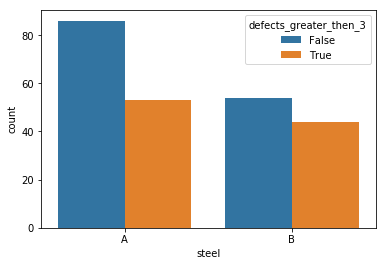

In [93]:
sns.countplot(x="steel", hue='defects_greater_then_3', data=data);

### Ниже доля партий каждой из сталей, в которых 4 и более бракованных листа

In [109]:
data_a = data[data["steel"] == "A"]
data_b = data[data["steel"] == "B"]
#print("For steel A:", (data_a["greater_then_3"] == True).sum()/(data_a["greater_then_3"] == False).sum())
#print("For steel B:", (data_b["greater_then_3"] == True).sum()/(data_b["greater_then_3"] == False).sum())
#data_a.shape
print("For steel A:", data_a["defects_greater_then_3"].mean())
print("For steel B:", data_b["defects_greater_then_3"].mean())

For steel A: 0.381294964028777
For steel B: 0.4489795918367347


### Ответ: более 3 бракованных листов марки А выходит немного больше, чем марки В за счет того, что стали марки А производится больше, чем стали марки В. При этом доля партий, в которых более 3 бракованных листов, для марки А меньше, чем для марки В.

## Задание 1.2

### Отвечая на вопрос 2, необходимо также разделить выборку на две: в одной окажутся партии, в которых скорость прокатки более 4 м/с, в другой - более, и провести исследование, аналогичное ответу на вопрос 1

In [95]:
data["speed_greater_than_4"] = data["speed"] > 4
pd.crosstab(data["defects_greater_then_3"], [data["speed_greater_than_4"]], margins=True, normalize=True)

speed_greater_than_4,False,True,All
defects_greater_then_3,,,
False,0.147679,0.443038,0.590717
True,0.097046,0.312236,0.409283
All,0.244726,0.755274,1.000000


In [111]:
#data[data["defects_greater_then_3"] == True].groupby('speed').size().plot(kind='bar');
data.groupby('speed')["defects_greater_then_3"].agg(np.mean)

speed
2.5    0.000000
2.8    1.000000
2.9    0.000000
3.0    0.500000
3.1    1.000000
3.2    0.500000
3.3    0.000000
3.4    0.500000
3.5    0.600000
3.6    0.166667
3.7    0.750000
3.8    0.600000
3.9    0.200000
4.0    0.272727
4.1    0.562500
4.2    0.250000
4.3    0.181818
4.4    0.500000
4.5    0.500000
4.6    0.450000
4.7    0.235294
4.8    0.500000
4.9    0.571429
5.0    0.538462
5.1    0.571429
5.2    0.375000
5.3    0.333333
5.4    0.285714
5.5    0.000000
5.6    0.500000
5.7    0.500000
5.8    0.333333
5.9    0.500000
6.0    0.500000
6.2    1.000000
6.5    0.000000
Name: defects_greater_then_3, dtype: float64

In [112]:
data_4l = data[data["speed_greater_than_4"] == False]
data_4g = data[data["speed_greater_than_4"] == True]

### Ниже доля партий каждой из подвыборок, в которых 4 и более бракованных листа

In [115]:
print("For speeds, less than 4: {}".format(data_4l["defects_greater_than_3"].mean()))
print("For speeds, greater than 4: {}".format(data_4g["defects_greater_than_3"].mean()))

For speeds, less than 4: 0.39655172413793105
For speeds, greater than 4: 0.4134078212290503


### На гистограмме ниже видно, что большинство партий делается со скоростями прокатки более 4 м/c, а доля партий, в которых 4 и более бракованных листа, примерно одинакова

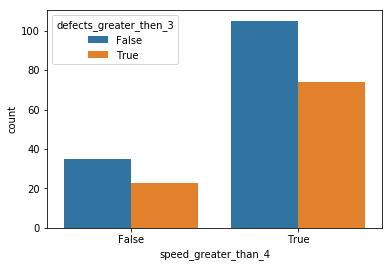

In [116]:
sns.countplot(x="speed_greater_than_4", hue='defects_greater_then_3', data=data);

### Ответ: Количество партий, содержащих более трех бракованных листов, значительно больше при скоростях прокатки выше 4 м/с, так как такие скорости применяются существенно чаще. При этом доля таких партий для скоростей выше и ниже 4 м/с примерно одинакова

## Вывод

### Вопросы, поставленные в задаче, показывают, насколько бинарные признаки могут исказить действительность. Для обеспечения качества серийной продукции удачным решением будет отслеживание некоторой непрерывной метрики качества и ее соответствие контрольным пределам. А для улучшения качества продукции потребуется более подробно изучать процесс производства, чтобы понять, какие факторы влияют на качество сильнее других.